# MNIST Datasets

### 1) Download Datasets

In [54]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(root="digitData", train=True, download=True, transform=ToTensor(), target_transform=None)

test_data = datasets.MNIST(root="digitData", train=False, download=True, transform=ToTensor(), target_transform=None)


In [55]:
len(train_data), len(test_data)

(60000, 10000)

In [56]:
class_names = train_data.classes
class_to_idx = train_data.class_to_idx

### 2) Visulaize Datasets

In [57]:
# train_data.target
image, label = train_data[0]
image.shape, class_names[label]

(torch.Size([1, 28, 28]), '5 - five')

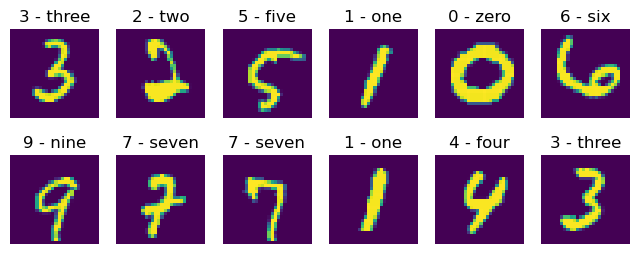

In [58]:
import matplotlib.pyplot as plt
import torch

fig = plt.figure(figsize=(8,3))
rows, col = 2, 6
for i in range(1, rows * col + 1):
    random_indx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_indx]
    fig.add_subplot(rows, col, i)
    plt.imshow(image.squeeze())
    plt.title(class_names[label])
    plt.axis(False)

### 3) DataLoader

In [59]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

In [60]:
print(len(test_dataloader), len(train_dataloader))
print(len(test_data) / 32, len(train_data) / 32)

313 1875
312.5 1875.0


### 4) Viusulaize the DataLoader (Single Batch)

In [61]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

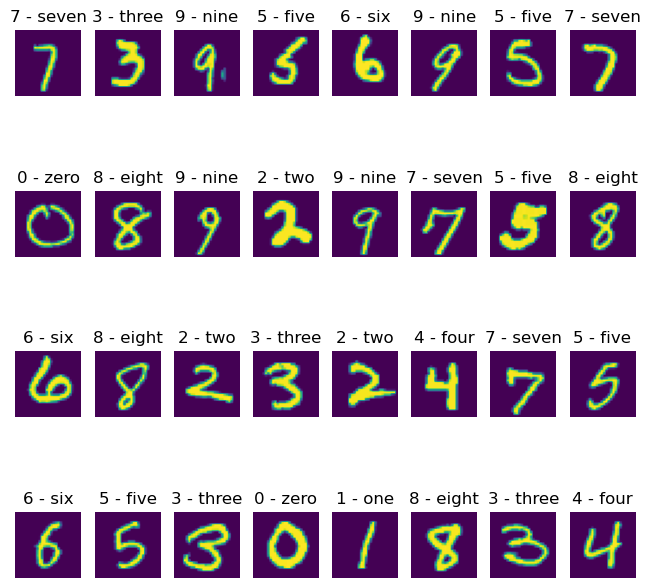

In [62]:
# Ensure train_features_batch and train_labels_batch contain a batch of data
fig = plt.figure(figsize=(8,8))
rows, cols = 4, 8  # Define grid layout
count = 0  # Counter for indexing batch elements

for i in range(1, rows * cols + 1):
    img, label = train_features_batch[count], train_labels_batch[count]  # Extract image and label
    fig.add_subplot(rows, cols, i)  # Fix the typo (cols instead of col)
    plt.imshow(img.squeeze())  # Ensure grayscale display
    plt.title(class_names[label])  # Ensure class_names is defined
    plt.axis("off")  # Fix axis off syntax
    count += 1  # Increment count

plt.show()  # Show the plot


### 5) BBuild a Model

In [63]:
from torch import nn

class MNISTModel(nn.Module):
    def __init__(self, input_shape, hidden_unit, output_shape):
        super().__init__()
        self.layerstack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_unit),
            nn.ReLU(),
            nn.Linear(hidden_unit, 64),
            nn.ReLU(),
            nn.Linear(64, output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layerstack(x)

In [64]:
# (torch.Size([32, 1, 28, 28]), torch.Size([32]))

model = MNISTModel(28*28, 32, len(class_names))
model

MNISTModel(
  (layerstack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=32, bias=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=10, bias=True)
    (6): ReLU()
  )
)

### 6) Loss function and optimizer

In [65]:
# loss_fn = nn.CrossEntropyLoss()
# optimzer = torch.optim.SGD(model.parameters(), lr = 0.01)

### 7) Accuracy Function

In [66]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

### 8) Train a model

In [67]:
from tqdm.auto import tqdm

epochs = 10
loss_fn = nn.CrossEntropyLoss()
optimzer = torch.optim.SGD(model.parameters(), lr = 0.01)
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}")
    train_loss = 0
    train_acc = 0
    for batch, (img, label) in enumerate(train_dataloader):
        model.train()
        y_pred = model(img)
        loss = loss_fn(y_pred, label)
        train_loss += loss
        train_acc += accuracy_fn(label, y_pred.argmax(dim=1))
        optimzer.zero_grad()
        loss.backward()
        optimzer.step()
        # if batch % 1000 == 0:
        #     print(f"Looked at {batch * len(img)} / {len(train_dataloader.dataset)} samples")
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    print(f"Train Loss : {train_loss:.4f}, Train Accuracy : {train_acc:.4f}")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 0
Train Loss : 1.6620, Train Accuracy : 47.8567
Epoch : 1
Train Loss : 0.9013, Train Accuracy : 69.8200
Epoch : 2
Train Loss : 0.6420, Train Accuracy : 78.8000
Epoch : 3
Train Loss : 0.5424, Train Accuracy : 81.3133
Epoch : 4
Train Loss : 0.5055, Train Accuracy : 82.2150
Epoch : 5
Train Loss : 0.4806, Train Accuracy : 82.8600
Epoch : 6
Train Loss : 0.4617, Train Accuracy : 83.3833
Epoch : 7
Train Loss : 0.4458, Train Accuracy : 83.8283
Epoch : 8
Train Loss : 0.4327, Train Accuracy : 84.1383
Epoch : 9
Train Loss : 0.2399, Train Accuracy : 92.6833


In [68]:
loss, acc = 0, 0
model.eval()

with torch.inference_mode():
    for test_img, test_label in test_dataloader:
        test_pred = model(test_img)
        loss += loss_fn(test_pred, test_label)
        acc += accuracy_fn(test_label, test_pred.argmax(dim = 1))
    
    loss /= len(test_dataloader)
    acc /= len(test_dataloader)
    print(f"Model : {model.__class__.__name__}, Loss : {loss:.4f}, Accuracy : {acc:.4f}")


Model : MNISTModel, Loss : 0.1732, Accuracy : 95.0879


In [69]:
test_features_batch, test_labels_batch = next(iter(test_dataloader))
test_features_batch.shape, test_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

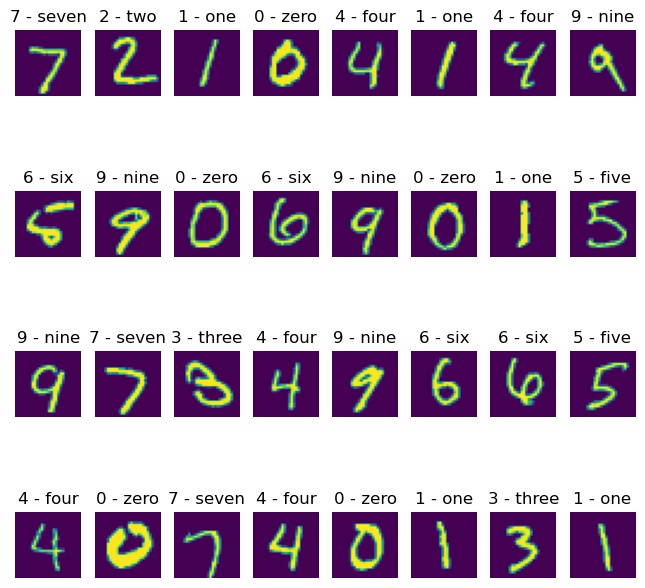

In [70]:
# Ensure train_features_batch and train_labels_batch contain a batch of data
fig = plt.figure(figsize=(8,8))
rows, cols = 4, 8  # Define grid layout
count = 0  # Counter for indexing batch elements

for i in range(1, rows * cols + 1):
    img, label = test_features_batch[count], test_labels_batch[count]  # Extract image and label
    predict_class = class_names[model(img).argmax(dim=1)]
    fig.add_subplot(rows, cols, i)  # Fix the typo (cols instead of col)
    plt.imshow(img.squeeze())  # Ensure grayscale display
    plt.title(predict_class)  # Ensure class_names is defined
    plt.axis("off")  # Fix axis off syntax
    count += 1  # Increment count

plt.show()  # Show the plot
